### Collecting dataset from Kaggle using API key

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:30<00:00, 38.5MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.6MB/s]


### Unzipping the Zip file of kaggle dataset

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import tensorflow as tf
from keras import Sequential
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

##### Lets Use Generators from keras to process the dataset of images which is reliable as it makes batches of data and executed it eventually

In [ ]:
## Generators

train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


##### Now the data is from 0-255 in numpy array, we need to normalize to 0-1

In [ ]:
## Normalize

def process(image, labels):
  image = tf.cast(image/255., tf.float32)
  return image, labels
train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

Now our dataset is ready

### Lets create CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape= (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', input_shape= (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', input_shape= (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 74s 113ms/step - loss: 1.4508 - accuracy: 0.5865 - val_loss: 0.6050 - val_accuracy: 0.6736
Epoch 2/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5766 - accuracy: 0.6926 - val_loss: 0.5327 - val_accuracy: 0.7364
Epoch 3/10
625/625 [==============================] - 73s 117ms/step - loss: 0.5090 - accuracy: 0.7526 - val_loss: 0.4835 - val_accuracy: 0.7752
Epoch 4/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4501 - accuracy: 0.7899 - val_loss: 0.5129 - val_accuracy: 0.7510
Epoch 5/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3886 - accuracy: 0.8227 - val_loss: 0.4685 - val_accuracy: 0.7872
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3252 - accuracy: 0.8612 - val_loss: 0.4988 - val_accuracy: 0.7878
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2506 - accuracy: 0.8970 - val_loss: 0.5570 - val_ac

### Previous Output:
Seems like the model is overfitting as the training accuracy is increasing but the validation accuracy is not increasing.

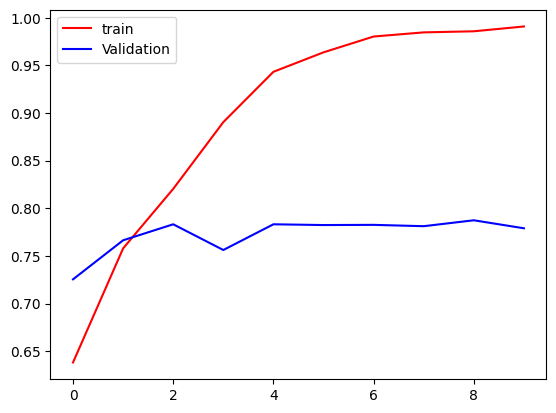

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation')
plt.legend()
plt.show()

### After adding BatchNormalization and Dropout layer:
Now it seems there is less gap between the train accuracy and validation accuracy. That means the model is performing a bit good after adding few normalization techniques

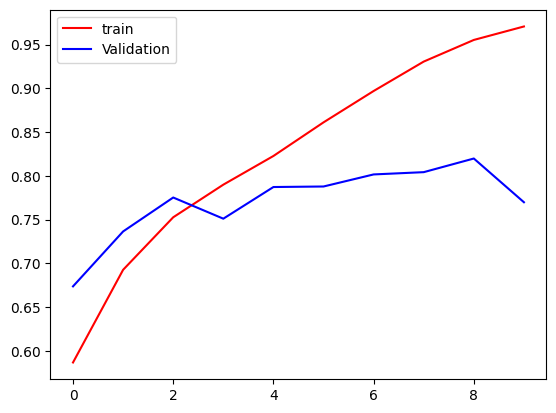

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation')
plt.legend()
plt.show()

We can even increase the validation accuracy by adding more normalization techniques like L2 regularization etc

## Lets test the model

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

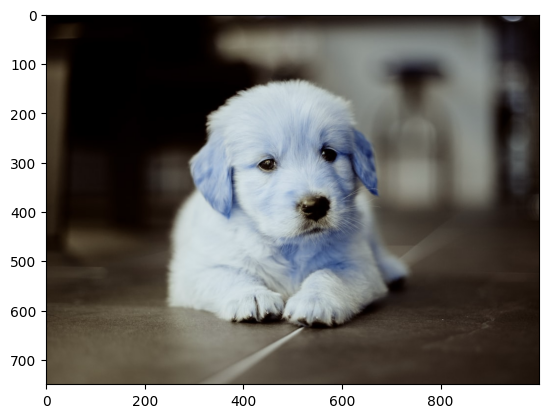

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(750, 1000, 3)

In [ ]:
test_img = cv2.resize(test_img, (256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 463ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

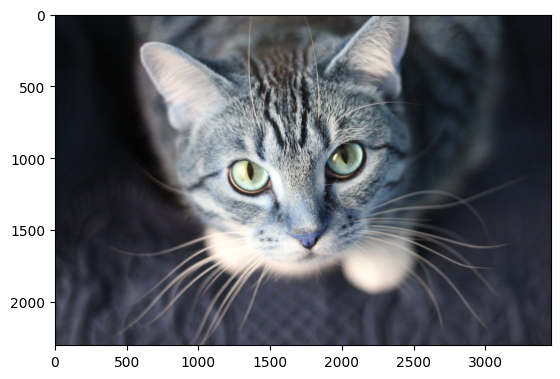

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(2304, 3456, 3)

In [ ]:
test_img = cv2.resize(test_img, (256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 26ms/step


array([[0.]], dtype=float32)